# Ejercicio 3 - Simulación de distribuciones condicionadas

### Julian Ferres - Nro.Padrón 101483

## Enunciado:

Sea $X$ \~ $N(0,1)$ truncada al intervalo $[-1,1]$

Imagine $m(x) = E[Y | X=x]$ como:

   
   \begin{equation}
     m(x) := \left\{
 \begin{array}{ll}
      \frac{(x + 2)^2}{2} & \mathrm{si\ } si -1\leq x<-0.5 \\
    \frac{x}{2}+0.875     & \mathrm{si\ } -0.5 \leq x \leq 0\\
    -5(x-0.2)^2 +1.075 & \mathrm{si\ } 0 < x \leq 0.5 \\
    x + 0.125 & \mathrm{si\ } 0.5 \leq x < 1 
           \end{array}
         \right.
    \end{equation}

Dado un $x$, la distribución condicional de $Y - m(x)$ es $N(0, \sigma ^2(x))$,

con $\sigma(x)=0.2-0.1 * \cos(2x)$

- Se pide simular $200$ puntos $(X,Y)$, y graficarlos en un plano. Además, vamos a necesitar
Los $200$ pares ordenados en cuestión, para hacer análisis posteriores


- El código generador de los pares ordenados.

## Solución:

#### Importo todas las librerias e inicializo funciones

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import cos, pi
from scipy.stats import truncnorm

In [3]:
m1 = lambda x: (x+2)**2/2
m2 = lambda x: x/2 + 0.875
m3 = lambda x: -5*(x-0.2)**2 + 1.075
m4 = lambda x: x + 0.125

In [4]:
def m(x):
    if -1 <= x <= -0.5:
        return m1(x)
    if -0.5 <= x < 0:
        return m2(x)
    if 0 < x <= 0.5:
        return m3(x)
    if 0.5 < x <= 1:
        return m4(x)

m = np.vectorize(m)

In [5]:
x_0 = np.linspace(-1,1,1000) #Me genero 1000 valores entre -1 y 1 para graficar m(x) 'suave'
y_0 = m(x_0)

#### Normal truncada 

In [6]:
a , b = -1 , 1 #Limites de la normal truncada

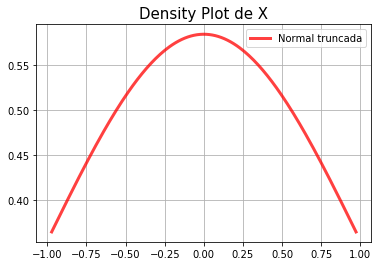

In [7]:
x1 = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 200) #Genero 200 cuantiles de la normal truncada 

plt.plot(x1, truncnorm.pdf(x1, a, b),
        'r-', lw=3, alpha=0.75, label='Normal truncada')
plt.title("Density Plot de X",fontsize='15')
plt.legend(loc='best', frameon= True)
plt.grid()

In [8]:
x1 = truncnorm.rvs(a, b, size=200)
#Me genero la muestra de distribucion X

In [9]:
sigma = np.vectorize(lambda x : 0.2 - 0.1 * cos(2*pi*x))
normal = np.vectorize(np.random.normal)

y1 = normal( m(x1),sigma(x1))

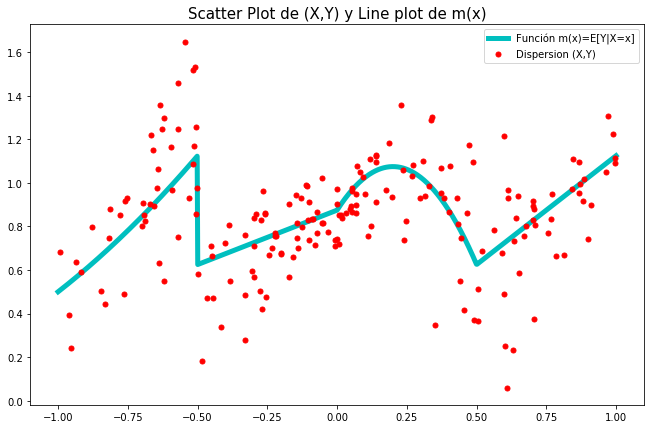

In [37]:
fig, ax = plt.subplots(figsize=(11,7))
plt.plot(x_0, y_0, 'c-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

plt.plot(x1, y1, 'ro' ,markersize= 5, label = 'Dispersion (X,Y)')
plt.legend(loc='best', frameon= True)

plt.title("Scatter Plot de (X,Y) y Line plot de m(x)", fontsize='15')
plt.show()

#### La muestra de los $200$ pares con distribución $(X,Y)$ se encuentra en la variable output

In [11]:
d = {'X': x1 , 'Y': y1 }
output = pd.DataFrame(data=d)

In [12]:
output.to_csv("simulacion.csv" , index = False )

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git